In [12]:
from plotnine import *
import pandas as pd
import numpy as np

In [20]:
# time = "2024-03-29_04:53"
time = "2024-03-29_07:23"
time = "2024-03-31_15:54"
time = "2024-03-31_16:37"
time = "2024-03-31_17:12"
time = "2024-04-01_15:42"
time = "2024-04-01_17:06"
time = "2024-04-01_18:11"
time = "2024-04-16_16:47"
time = "2024-04-18_19:23"
time = "2024-04-18_20:30"
time = "2024-04-19_01:29"
time = "2024-04-19_09:39"
time = "2024-05-19_16:34"
time = "2024-05-19_16:58"
time = "2024-05-19_17:38"
time = "2024-05-19_18:55"
time = "2024-05-20_04:15"
time = "2024-05-20_10:30"
time = "2024-05-29_13:27"
time = "2024-06-10_12:52"
time = "2024-06-10_19:47"


df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_2/unsupervised/kmeans/results/{time}_results.csv")

# df['test_cumsum_annualized_return'] = df['test_cumsum_annualized_return'] * -1
# remove where dist_measure is 2
# remove where future_candles is 5
# remove where n_clusters is 150 or 200
# remove where log_return_threshold is greater than 0.01
# remove where calmar_ratio_threshold is not 2

# df = df[df["dist_measure"] != 2]
# df = df[df["window"] < 5]
# df = df[df["random_state"] == 42]
# df = df[df["test_size"] == 2880]
# df = df[df["algorithm"] == "kmeans"]
# df = df[(df["test_negative_sharpe_ratio"] >= 1) | (df["test_sharpe_ratio"] >= 1)]
df = df[(df["test_negative_sharpe_ratio"] >= 0.15) | (df["test_sharpe_ratio"] >= 0.15)]

# df = df[(df["algorithm"] == 'gaussian_mixture')]
# df = df[(df["max_k_labels"] == 1)]
# df = df[(df["random_state"] == 200)]

df

,window,train_sum_annualized_return,train_sum_actual_return,train_n_trades,test_sum_annualized_return,test_sum_actual_return,test_n_trades,train_cumsum_annualized_return,train_cumsum_actual_return,train_sharpe_ratio,test_cumsum_annualized_return,test_cumsum_actual_return,test_sharpe_ratio,test_negative_sharpe_ratio,max_k_labels,n_clusters,algorithm,train_size,test_size,random_state
27005,0,0.73,73,207,0.18,18,18,0.73,73,4.373241,0.18,18,0.158989,-0.347887,2,110,kmeans,8640,960,1
27006,1,0.81,81,203,0.02,2,34,1.54,154,4.373241,0.20,20,0.158989,-0.347887,2,110,kmeans,8640,960,1
27007,2,0.73,73,196,-0.05,-5,23,2.27,227,4.373241,0.15,15,0.158989,-0.347887,2,110,kmeans,8640,960,1
27008,3,0.56,56,177,0.05,5,23,2.83,283,4.373241,0.20,20,0.158989,-0.347887,2,110,kmeans,8640,960,1
27009,4,0.53,53,198,-0.08,-8,18,3.36,336,4.373241,0.12,12,0.158989,-0.347887,2,110,kmeans,8640,960,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207546,116,1.69,169,497,-0.18,-18,66,235.21,23521,4.267956,5.75,575,0.159304,-0.239287,5,90,kmeans,7680,960,2
207547,117,1.75,175,564,0.09,9,53,236.96,23696,4.267956,5.84,584,0.159304,-0.239287,5,90,kmeans,7680,960,2
207548,118,1.65,165,511,-0.01,-1,79,238.61,23861,4.267956,5.83,583,0.159304,-0.239287,5,90,kmeans,7680,960,2
207549,119,1.52,152,478,0.00,0,42,240.13,24013,4.267956,5.83,583,0.159304,-0.239287,5,90,kmeans,7680,960,2


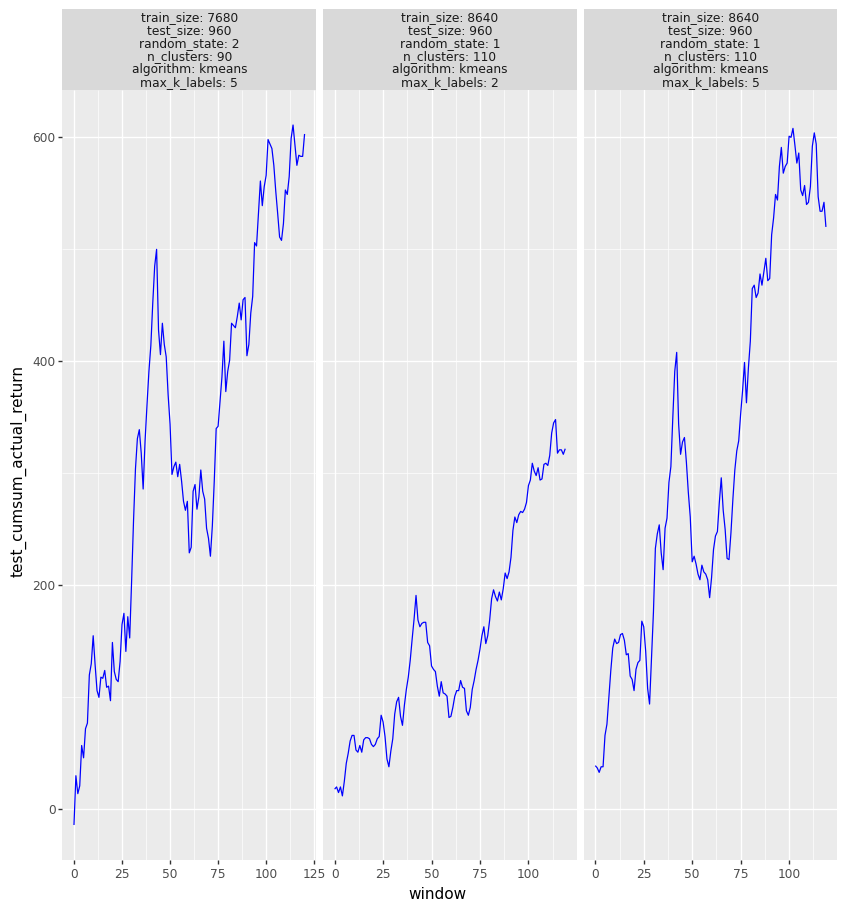

In [21]:
p = ggplot(df)
# p = p + geom_line(aes(x="window", y="train_cumsum_annualized_return"), color="red")
p = p + geom_line(aes(x="window", y="test_cumsum_actual_return"), color="blue")
# p = p + geom_line(aes(x="window", y="val_avg_calmar_ratio"), color="red")
# p = p + facet_wrap("~train_size + random_state", scales="free_x", labeller="label_both")
p = p + facet_wrap("~train_size + test_size + random_state + n_clusters + algorithm + max_k_labels", scales="free_x", labeller="label_both")
# p = p + theme(figure_size=(35, 35))
p = p + theme(figure_size=(10, 10))
print(p)

In [ ]:

time = "2024-03-14_19:00"
df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_2/kmeans/results/{time}_results.csv")

p = ggplot(df)
p = p + geom_line(aes(x="window", y="test_cumsum_annualized_return"), color="blue")
# p = p + geom_line(aes(x="window", y="val_cumsum_annualized_return"), color="red")
p = p + facet_wrap("~train_size + test_size + random_state", scales="free_x", labeller="label_both")
p = p + theme(axis_text_x=element_text(angle=90), figure_size=(30, 30))
print(p)